## STA 141B, Lecture 7

## Data Munging

### James Sharpnack

## US College Scorecard data

- national college scorecard dataset: https://collegescorecard.ed.gov/data/ 
- dataset is a large comparison of accredited colleges and universities in the U.S

> The College Scorecard is designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students.

In [2]:
import pandas as pd
import numpy as np

datadir = "data"
COL = pd.read_csv(datadir + '/MERGED2009_10_PP.csv')
col_dna = COL.dropna(axis=1)
col_dtypes = dict(col_dna.dtypes.replace(np.dtype('int64'),np.dtype('float64'))) # make the dtypes floats
col_dtypes['UNITID'] = np.dtype('int64') # convert the UNITID back to int
vars_interest = ['ADM_RATE','UGDS','TUITIONFEE_IN','TUITIONFEE_OUT','MN_EARN_WNE_P10'] # Include these vars
col_dtypes.update({a: np.dtype('float64') for a in vars_interest}) # make them floats

/home/jsharpna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Apply what we learned to all data files

def read_cs_data(year,col_dtypes,datadir):
    """read a CollegeScorecard dataframe"""
    nextyr = str(int(year) + 1)[-2:]
    filename = datadir + '/MERGED{}_{}_PP.csv'.format(year,nextyr)
    col = pd.read_csv(filename,na_values='PrivacySuppressed',
                      dtype=col_dtypes,usecols=col_dtypes.keys())
    col['Year'] = pd.Period(str(int(year) + 1),freq='Y')
    return col

In [4]:
## pd.concat stacks DataFrames (append rows)

col = pd.concat((read_cs_data(str(y),col_dtypes,datadir) for y in range(1996,2017))) # gen exp
col = col.set_index(['UNITID','Year']) # set multi index

In [5]:
col.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL
UNITID,Year,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,44141.0,NaN,NaN,NaN,2.0
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,1.0,1.0,5.0,NaN,3852.0,NaN,NaN,NaN,1.0
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,1.0,1.0,5.0,NaN,9889.0,NaN,NaN,NaN,1.0
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,1.0,1.0,5.0,NaN,295.0,NaN,NaN,NaN,2.0
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,2.0,1.0,5.0,NaN,60.0,NaN,NaN,NaN,1.0


In [6]:
## Could we do this with joins?
## Read in two years
col_00, col_01 = (read_cs_data(str(y),col_dtypes,datadir).set_index('UNITID') for y in range(2000,2002))

## Join these tables
col_join = col_00.join(col_01,how='left',lsuffix='_00',rsuffix='_01')
col_join.head()

,OPEID_00,OPEID6_00,INSTNM_00,CITY_00,STABBR_00,ZIP_00,MAIN_00,NUMBRANCH_00,PREDDEG_00,HIGHDEG_00,...,CONTROL_01,ST_FIPS_01,REGION_01,ADM_RATE_01,UGDS_01,TUITIONFEE_IN_01,TUITIONFEE_OUT_01,MN_EARN_WNE_P10_01,ICLEVEL_01,Year_01
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,...,1.0,1.0,5.0,0.7505,4671.0,4664.0,5200.0,NaN,1.0,2002
100663,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,1.0,3.0,4.0,...,1.0,1.0,5.0,0.9098,9183.0,3640.0,6610.0,NaN,1.0,2002
100690,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,...,2.0,1.0,5.0,NaN,155.0,NaN,NaN,NaN,1.0,2002
100706,00105500,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,1.0,1.0,3.0,4.0,...,1.0,1.0,5.0,0.8381,4541.0,3536.0,7430.0,NaN,1.0,2002
100724,00100500,1005.0,Alabama State University,Montgomery,AL,36104-0271,1.0,1.0,3.0,4.0,...,1.0,1.0,5.0,NaN,4711.0,2904.0,5808.0,NaN,1.0,2002


In [7]:
## comparing shapes
col_join.shape, col_00.shape, col_01.shape, col.shape

((6478, 40), (6478, 20), (6619, 20), (147170, 19))

## Types of joins tables 
### What do we do when there is no match?

- *left join:* the rows in the left table are preserved, and matched to rows in the right table with NaNs when there is no match.
- *right join:* the rows in the right table are preserved, and matched to rows in the left table with NaNs when there is no match.
- *inner join:* the rows in the left and right tables are matched and the row is omitted if there is no match (this intersects the two tables indices).
- *outer/full join:* the rows in the left and right table are matched, either table’s variables are filled with NaNs when there is no match (this unions the two tables indices).

![](https://www.dofactory.com/Images/sql-joins.png)

## Which is better in this case?

### 1. Join table
### 2. Concatenate w/ year variable

In [8]:
col.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL
UNITID,Year,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,44141.0,NaN,NaN,NaN,2.0
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,1.0,1.0,5.0,NaN,3852.0,NaN,NaN,NaN,1.0
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,1.0,1.0,5.0,NaN,9889.0,NaN,NaN,NaN,1.0
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,1.0,1.0,5.0,NaN,295.0,NaN,NaN,NaN,2.0
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,2.0,1.0,5.0,NaN,60.0,NaN,NaN,NaN,1.0


In [38]:
col_join.columns

Index(['OPEID_00', 'OPEID6_00', 'INSTNM_00', 'CITY_00', 'STABBR_00', 'ZIP_00',
       'MAIN_00', 'NUMBRANCH_00', 'PREDDEG_00', 'HIGHDEG_00', 'CONTROL_00',
       'ST_FIPS_00', 'REGION_00', 'ADM_RATE_00', 'UGDS_00', 'TUITIONFEE_IN_00',
       'TUITIONFEE_OUT_00', 'MN_EARN_WNE_P10_00', 'ICLEVEL_00', 'Year_00',
       'OPEID_01', 'OPEID6_01', 'INSTNM_01', 'CITY_01', 'STABBR_01', 'ZIP_01',
       'MAIN_01', 'NUMBRANCH_01', 'PREDDEG_01', 'HIGHDEG_01', 'CONTROL_01',
       'ST_FIPS_01', 'REGION_01', 'ADM_RATE_01', 'UGDS_01', 'TUITIONFEE_IN_01',
       'TUITIONFEE_OUT_01', 'MN_EARN_WNE_P10_01', 'ICLEVEL_01', 'Year_01'],
      dtype='object')

In [10]:
## we will focus on these columns
num_cols = ['ADM_RATE', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MN_EARN_WNE_P10'] 
colnums = col[num_cols]

In [11]:
colnums.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10
count,40545.000000,130640.000000,70867.000000,69052.000000,28781.000000
mean,0.694663,2183.304363,11286.375788,13433.914832,37772.016261
std,0.215981,4852.005380,9517.436452,8847.239612,15754.465400
min,0.000000,0.000000,0.000000,0.000000,12200.000000
25%,0.555600,115.000000,3600.000000,6930.000000,27700.000000
50%,0.718700,472.500000,9075.000000,11536.000000,35100.000000
75%,0.857400,1978.000000,15820.000000,17568.000000,44100.000000
max,1.000000,253594.000000,74787.000000,74787.000000,250000.000000


In [12]:
## Try taking the ratio
colnums['TUITRAT'] = colnums['TUITIONFEE_OUT'] / colnums['TUITIONFEE_IN']

/home/jsharpna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
## Copy to avoid this issue ^^
coll_num_cols = ['ADM_RATE', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MN_EARN_WNE_P10']
colnums = col[coll_num_cols].copy()

In [14]:
## We can use eval instead!
# colnums['TUITRAT'] = colnums['TUITIONFEE_OUT'] / colnums['TUITIONFEE_IN']
colnums['TUITRAT'] = colnums.eval('TUITIONFEE_OUT / TUITIONFEE_IN')
colnums.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
count,40545.000000,130640.000000,70867.000000,69052.000000,28781.000000,6.902200e+04
mean,0.694663,2183.304363,11286.375788,13433.914832,37772.016261,inf
std,0.215981,4852.005380,9517.436452,8847.239612,15754.465400,NaN
min,0.000000,0.000000,0.000000,0.000000,12200.000000,9.951409e-01
25%,0.555600,115.000000,3600.000000,6930.000000,27700.000000,1.000000e+00
50%,0.718700,472.500000,9075.000000,11536.000000,35100.000000,1.000000e+00
75%,0.857400,1978.000000,15820.000000,17568.000000,44100.000000,2.131421e+00
max,1.000000,253594.000000,74787.000000,74787.000000,250000.000000,inf


In [15]:
## Deal separately with the 0 tuitions
colnums.loc[colnums['TUITIONFEE_IN'] == 0.,'TUITRAT'] = np.nan
colnums.loc[colnums['TUITIONFEE_IN'] != 0.,'TUITRAT'] \
= colnums[colnums['TUITIONFEE_IN'] != 0.].eval('TUITIONFEE_OUT / TUITIONFEE_IN')
colnums.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
count,40545.000000,130640.000000,70867.000000,69052.000000,28781.000000,69010.000000
mean,0.694663,2183.304363,11286.375788,13433.914832,37772.016261,1.759976
std,0.215981,4852.005380,9517.436452,8847.239612,15754.465400,1.426970
min,0.000000,0.000000,0.000000,0.000000,12200.000000,0.995141
25%,0.555600,115.000000,3600.000000,6930.000000,27700.000000,1.000000
50%,0.718700,472.500000,9075.000000,11536.000000,35100.000000,1.000000
75%,0.857400,1978.000000,15820.000000,17568.000000,44100.000000,2.130426
max,1.000000,253594.000000,74787.000000,74787.000000,250000.000000,16.909091


In [16]:
## Let's apply a Z-score transformation

def Zscore(x):
    """Z scores"""
    return (x - x.mean()) / x.std()

colZs = colnums.transform(Zscore)

In [17]:
colZs.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
count,4.054500e+04,1.306400e+05,7.086700e+04,6.905200e+04,2.878100e+04,6.901000e+04
mean,1.240449e-14,-2.202209e-16,-3.205367e-15,-5.205694e-16,2.513634e-16,-3.563147e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.216310e+00,-4.499798e-01,-1.185863e+00,-1.518430e+00,-1.623160e+00,-5.359857e-01
25%,-6.438665e-01,-4.262783e-01,-8.076099e-01,-7.351349e-01,-6.393118e-01,-5.325805e-01
50%,1.112909e-01,-3.525974e-01,-2.323499e-01,-2.145206e-01,-1.696037e-01,-5.325805e-01
75%,7.534757e-01,-4.231330e-02,4.763493e-01,4.672740e-01,4.016629e-01,2.596056e-01
max,1.413718e+00,5.181583e+01,6.672030e+00,6.934715e+00,1.347097e+01,1.061628e+01


In [18]:
## Great, let's transfer to full data and include Zs
col['TUITRAT'] = colnums['TUITRAT']
col_wZ = col.join(colZs,rsuffix='_Z')

In [19]:
col_wZ.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,...,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL,TUITRAT,ADM_RATE_Z,UGDS_Z,TUITIONFEE_IN_Z,TUITIONFEE_OUT_Z,MN_EARN_WNE_P10_Z,TUITRAT_Z
UNITID,Year,,,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,...,NaN,NaN,2.0,NaN,NaN,8.647496,NaN,NaN,NaN,NaN
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,...,NaN,NaN,1.0,NaN,NaN,0.343919,NaN,NaN,NaN,NaN
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,...,NaN,NaN,1.0,NaN,NaN,1.588147,NaN,NaN,NaN,NaN
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,...,NaN,NaN,2.0,NaN,NaN,-0.389180,NaN,NaN,NaN,NaN
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,...,NaN,NaN,1.0,NaN,NaN,-0.437614,NaN,NaN,NaN,NaN


In [20]:
## Specifically UC Davis 
col_wZ.query('CITY=="Davis" and STABBR=="CA"')

OPEID  OPEID6                          INSTNM   CITY STABBR  \
UNITID Year                                                                   
110644 1997  00131300  1313.0  University of California-Davis  Davis     CA   
       1998  00131300  1313.0  University of California-Davis  Davis     CA   
       1999  00131300  1313.0  University of California-Davis  Davis     CA   
       2000  00131300  1313.0  University of California-Davis  Davis     CA   
       2001  00131300  1313.0  University of California-Davis  Davis     CA   
       2002  00131300  1313.0  University of California-Davis  Davis     CA   
       2003  00131300  1313.0  University of California-Davis  Davis     CA   
       2004  00131300  1313.0  University of California-Davis  Davis     CA   
       2005  00131300  1313.0  University of California-Davis  Davis     CA   
       2006  00131300  1313.0  University of California-Davis  Davis     CA   
       2007  00131300  1313.0  University of California-Davis  Davis     CA   
       2008  00131300  1313.0  University of California-Davis  Davis     CA   
       2009  00131300  1313.0  University of California-Davis  Davis     CA   
       2010  00131300  1313.0  University of California-Davis  Davis     CA   
       2011  00131300  1313.0  University of California-Davis  Davis     CA   
       2012  00131300  1313.0  University of California-Davis  Davis     CA   
       2013  00131300  1313.0  University of California-Davis  Davis     CA   
       2014  00131300  1313.0  University of California-Davis  Davis     CA   
       2015  00131300  1313.0  University of California-Davis  Davis     CA   
       2016  00131300  1313.0  University of California-Davis  Davis     CA   
       2017  00131300  1313.0  University of California-Davis  Davis     CA   

                    ZIP  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  ...  \
UNITID Year                                                 ...   
110644 1997  95616-8678   1.0        1.0      3.0      4.0  ...   
       1998  95616-8678   1.0        1.0      3.0      4.0  ...   
       1999  95616-8678   1.0        1.0      3.0      4.0  ...   
       2000  95616-8678   1.0        1.0      3.0      4.0  ...   
       2001  95616-8678   1.0        1.0      3.0      4.0  ...   
       2002  95616-8678   1.0        1.0      3.0      4.0  ...   
       2003  95616-8678   1.0        1.0      3.0      4.0  ...   
       2004  95616-8678   1.0        1.0      3.0      4.0  ...   
       2005  95616-8678   1.0        1.0      3.0      4.0  ...   
       2006  95616-8678   1.0        2.0      3.0      4.0  ...   
       2007  95616-8678   1.0        2.0      3.0      4.0  ...   
       2008  95616-8678   1.0        1.0      3.0      4.0  ...   
       2009  95616-8678   1.0        1.0      3.0      4.0  ...   
       2010  95616-8678   1.0        1.0      3.0      4.0  ...   
       2011  95616-8678   1.0        1.0      3.0      4.0  ...   
       2012  95616-8678   1.0        1.0      3.0      4.0  ...   
       2013  95616-8678   1.0        1.0      3.0      4.0  ...   
       2014  95616-8678   1.0        1.0      3.0      4.0  ...   
       2015  95616-8678   1.0        1.0      3.0      4.0  ...   
       2016  95616-8678   1.0        1.0      3.0      4.0  ...   
       2017  95616-8678   1.0        1.0      3.0      4.0  ...   

             TUITIONFEE_OUT  MN_EARN_WNE_P10  ICLEVEL   TUITRAT  ADM_RATE_Z  \
UNITID Year                                                                   
110644 1997             NaN              NaN      1.0       NaN         NaN   
       1998             NaN              NaN      1.0       NaN         NaN   
       1999             NaN              NaN      1.0       NaN         NaN   
       2000             NaN              NaN      1.0       NaN         NaN   
       2001         14686.0              NaN      1.0  3.606582         NaN   
       2002         15669.0              NaN      1.0  3.410011   -0.288743   
       2003         1697

- UC Davis UGDS Z score is increasing
- UC Davis Tuition Z score is increasing
- UC Davis UGDS Z score is increasing

In [21]:
## groupby: grouping transformation, typically followed by aggregation
## Can group by level of multiindex variable
cyear_grp = colnums.groupby(level=1) 
type(cyear_grp)

pandas.core.groupby.generic.DataFrameGroupBy

In [22]:
## Mean aggregation
cyear_grp.mean()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
Year,,,,,,
1997,NaN,1812.882965,NaN,NaN,NaN,NaN
1998,NaN,1748.487175,NaN,NaN,NaN,NaN
1999,NaN,1809.848019,NaN,NaN,NaN,NaN
2000,NaN,1874.508024,NaN,NaN,NaN,NaN
2001,NaN,NaN,6824.317881,8589.959964,NaN,2.114759
2002,0.743175,1894.593705,7412.965074,9080.665982,NaN,2.031099
2003,0.722928,2022.165039,7865.650249,9599.365920,NaN,2.006763
2004,0.723937,2077.375218,8400.728266,10229.640845,NaN,1.864392
2005,0.707890,2139.414416,9008.924057,10893.408430,NaN,1.776840


In [23]:
## Describe aggregation
cyear_grp.describe()

ADM_RATE                                                                \
        count      mean       std     min       25%      50%       75%  max   
Year                                                                          
1997      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
1998      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
1999      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
2000      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
2001      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
2002   2459.0  0.743175  0.204965  0.0528  0.637000  0.78050  0.897500  1.0   
2003   2831.0  0.722928  0.214417  0.0357  0.586450  0.75620  0.887650  1.0   
2004   2859.0  0.723937  0.216245  0.0286  0.591000  0.75860  0.887950  1.0   
2005   2767.0  0.707890  0.220958  0.0000  0.565600  0.73950  0.872650  1.0   
2006   2803.0  0.704577  0.221582  0.0000  0.563800  0.73430  0.875600  1.0   
2007   2850.0  0.701611  0.225238  0.0000  0.548625  0.72755  0.882325  1.0   
2008   2833.0  0.689864  0.221276  0.0000  0.536100  0.71320  0.861500  1.0   
2009   2793.0  0.678191  0.220301  0.0000  0.530300  0.69570  0.846200  1.0   
2010   2774.0  0.685953  0.215973  0.0000  0.543025  0.70315  0.845575  1.0   
2011   2307.0  0.653451  0.219613  0.0000  0.497850  0.67340  0.812200  1.0   
2012   2347.0  0.673767  0.206930  0.0000  0.544900  0.69080  0.818850  1.0   
2013   2309.0  0.673983  0.208422  0.0000  0.538300  0.69100  0.829000  1.0   
2014   2221.0  0.683853  0.208593  0.0000  0.554300  0.70160  0.835000  1.0   
2015   2196.0  0.693585  0.206903  0.0000  0.567450  0.71475  0.845550  1.0   
2016   2172.0  0.687285  0.206298  0.0000  0.560825  0.71125  0.839625  1.0   
2017   2024.0  0.670379  0.209506  0.0000  0.541700  0.69215  0.825075  1.0   

        UGDS               ... MN_EARN_WNE_P10           TUITRAT            \
       count         mean  ...             75%       max   count      mean   
Year                       ...                                               
1997  6246.0  1812.882965  ...             NaN       NaN     0.0       NaN   
1998  6394.0  1748.487175  ...             NaN       NaN     0.0       NaN   
1999  6185.0  1809.848019  ...             NaN       NaN     0.0       NaN   
2000  6169.0  1874.508024  ...             NaN       NaN     0.0       NaN   
2001     0.0          NaN  ...             NaN       NaN  3315.0  2.114759   
2002  6291.0  1894.593705  ...             NaN       NaN  3884.0  2.031099   
2003  6247.0  2022.165039  ...             NaN       NaN  4019.0  2.006763   
2004  6303.0  2077.375218  ...             NaN       NaN  4114.0  1.864392   
2005  6257.0  2139.414416  ...             NaN       NaN  4124.0  1.776840   
2006  6341.0  2142.811071  ...             NaN       NaN  4113.0  1.768870   
2007  6357.0  2170.394683  ...             NaN       NaN  4059.0  1.784735   
2008  6388.0  2203.222135  ...         46300.0  148400.0  4155.0  1.791051   
2009  6476.0  2367.665998  ...             NaN       NaN  4054.0  1.803404   
2010  6596.0  2500.305488  ...         44700.0  241200.0  4113.0  1.727200   
2011  6864.0  2507.803176  ...             NaN       NaN  4155.0  1.699682   
2012  7052.0  2440.643647  ...         43200.0  250000.0  4251.0  1.621896   
2013  7087.0  2377.093410  ...         43100.0  250000.0  4250.0  1.590264   
2014  7091.0  2332.675363  ...         43600.0  250000.0  4287.0  1.582393   
2015  6990.0  2332.278255  ...             NaN       NaN  4183.0  1.596528   
2016  6859.0  2319.261700  ...             NaN       NaN  4089.0  1.611342   
2017  6447.0  2424.045603  ...             NaN       NaN  3845.0  1.651791   

                                                         
           std       min  25%  50%       75%        max  
Year                                                     
1997       NaN       NaN  NaN  NaN       NaN        NaN  
199

In [24]:
cyear_grp.describe()['TUITRAT']

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1997,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,3315.0,2.114759,2.002647,1.000000,1.0,1.0,2.565776,13.363636
2002,3884.0,2.031099,2.047651,1.000000,1.0,1.0,2.387593,15.909091
2003,4019.0,2.006763,2.081419,1.000000,1.0,1.0,2.279782,16.909091
2004,4114.0,1.864392,1.574430,1.000000,1.0,1.0,2.248160,12.121212
2005,4124.0,1.776840,1.317597,1.000000,1.0,1.0,2.192221,7.968889


In [25]:
## pd.qcut is a neat transformation
## separate by size and exclusivity
col['SIZE'] = pd.qcut(col['UGDS'],3,labels=['small','med','large'])
col['EXCLUS'] = pd.qcut(col['ADM_RATE'],3,labels=['exclus','access','open'])

In [26]:
col.count()

OPEID              147170
OPEID6             147170
INSTNM             147170
CITY               147170
STABBR             147170
ZIP                147170
MAIN               147170
NUMBRANCH          147170
PREDDEG            147170
HIGHDEG            147170
CONTROL            147147
ST_FIPS            147169
REGION             147169
ADM_RATE            40545
UGDS               130640
TUITIONFEE_IN       70867
TUITIONFEE_OUT      69052
MN_EARN_WNE_P10     28781
ICLEVEL            147147
TUITRAT             69010
SIZE               130640
EXCLUS              40545
dtype: int64

In [27]:
## Group by multiple cols and take median
col.groupby(['SIZE','EXCLUS']).median()[num_cols]

ADM_RATE    UGDS  TUITIONFEE_IN  TUITIONFEE_OUT  MN_EARN_WNE_P10
SIZE  EXCLUS                                                                  
small exclus    0.4000    76.0         9215.0          9433.0          34600.0
      access    0.7273    87.0        10470.0         10500.0          32100.0
      open      1.0000    80.0         9150.0          9150.0          30200.0
med   exclus    0.4888   604.0        16140.0         16356.0          39900.0
      access    0.7159   630.0        16333.0         16800.0          39600.0
      open      0.9359   472.0        13014.0         13648.0          35600.0
large exclus    0.4853  3657.0        16376.5         20760.0          48800.0
      access    0.7192  3141.5        15400.0         19564.0          47000.0
      open      0.8748  3294.0         8955.5         15463.5          44100.0

In [28]:
## Look at UC Davis with query
col.query('CITY=="Davis" and STABBR=="CA"')[['SIZE','EXCLUS']]

SIZE  EXCLUS
UNITID Year               
110644 1997  large     NaN
       1998  large     NaN
       1999  large     NaN
       2000  large     NaN
       2001    NaN     NaN
       2002  large  access
       2003  large  access
       2004  large  access
       2005  large  exclus
       2006  large  exclus
       2007  large  exclus
       2008  large  access
       2009  large  exclus
       2010  large  exclus
       2011  large  exclus
       2012  large  exclus
       2013  large  exclus
       2014  large  exclus
       2015  large  exclus
       2016  large  exclus
       2017  large  exclus

In [29]:
## Define a transformation
def Zscore(x):
    """Z scores"""
    return (x - x.mean()) / x.std()

In [30]:
### Group by size, highdeg, year and compute Zscores within groups
col = col.reset_index() # reset index - will be clear why 
col['YEAR'] = col['Year'] # create second year var
col = col.set_index(['UNITID','Year']) # set index again
sna, hna = col['SIZE'].isna(), col['HIGHDEG'].isna() # find where size and highdeg are nas

In [31]:
col_keep = ['SIZE','HIGHDEG','YEAR'] + num_cols # determine vars to keep
cby = col.loc[~(sna | hna),col_keep].groupby(['SIZE','HIGHDEG','YEAR']) # group
Z_gpbytype = cby.transform(Zscore) # transform

In [32]:
Z_gpbytype.head()

,,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10
UNITID,Year,,,,,
100636,1997,NaN,8.741195,NaN,NaN,NaN
100654,1997,NaN,-0.401769,NaN,NaN,NaN
100663,1997,NaN,0.614581,NaN,NaN,NaN
100672,1997,NaN,-0.901944,NaN,NaN,NaN
100690,1997,NaN,-0.388648,NaN,NaN,NaN


In [33]:
Z_gpbytype.shape, col.shape

((130640, 5), (147170, 23))

In [34]:
## Join Z-scores to full dataset
col_gpZ = col.join(Z_gpbytype,rsuffix = '_gpZ')
col_gpZ.count()

OPEID                  147170
OPEID6                 147170
INSTNM                 147170
CITY                   147170
STABBR                 147170
ZIP                    147170
MAIN                   147170
NUMBRANCH              147170
PREDDEG                147170
HIGHDEG                147170
CONTROL                147147
ST_FIPS                147169
REGION                 147169
ADM_RATE                40545
UGDS                   130640
TUITIONFEE_IN           70867
TUITIONFEE_OUT          69052
MN_EARN_WNE_P10         28781
ICLEVEL                147147
TUITRAT                 69010
SIZE                   130640
EXCLUS                  40545
YEAR                   147170
ADM_RATE_gpZ            40529
UGDS_gpZ               130579
TUITIONFEE_IN_gpZ       65073
TUITIONFEE_OUT_gpZ      65074
MN_EARN_WNE_P10_gpZ     27107
dtype: int64

In [35]:
davis = col_gpZ.query('CITY=="Davis" and STABBR=="CA"') # isolate davis
davis[['UGDS','UGDS_gpZ']] # undergrad pop

UGDS  UGDS_gpZ
UNITID Year                   
110644 1997  18738.0  2.104342
       1998  19002.0  2.154195
       1999  19258.0  2.153061
       2000  19393.0  2.143527
       2001      NaN       NaN
       2002  21217.0  2.361380
       2003  22646.0  2.511573
       2004  23360.0  2.555060
       2005  23018.0  2.399994
       2006  22596.0  2.261913
       2007  23311.0  2.195060
       2008  23355.0  1.940244
       2009  24058.0  1.698012
       2010  24496.0  1.724043
       2011  24538.0  1.648558
       2012  24938.0  1.661482
       2013  25588.0  1.851069
       2014  26483.0  2.128407
       2015  27547.0  2.242027
       2016  28239.0  2.308396
       2017  29358.0  2.459646

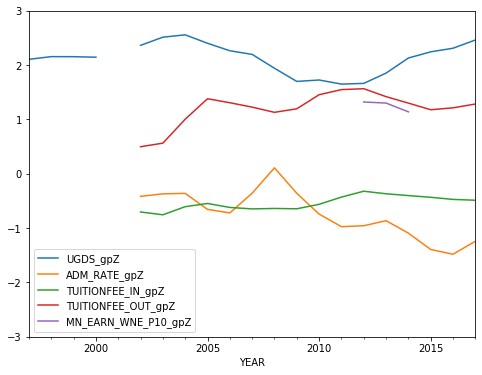

In [37]:
### Plotting Z-score trends
ax = davis.plot('YEAR','UGDS_gpZ')
davis.plot('YEAR','ADM_RATE_gpZ',ax=ax)
davis.plot('YEAR','TUITIONFEE_IN_gpZ',ax=ax)
davis.plot('YEAR','TUITIONFEE_OUT_gpZ',ax=ax)
davis.plot('YEAR','MN_EARN_WNE_P10_gpZ',ax=ax)
ax.set_ylim([-3,3])
ax.figure.set_size_inches([8,6])
ax